In [23]:
import torch
import pandas as pd
import numpy as np
import torch.utils
import torchvision.transforms
from torch import nn
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
#Loading house prices training and test dataset
hptrain = pd.read_csv("Datasets/hptrain.csv",index_col=0)
hptest = pd.read_csv("Datasets/hptest.csv",index_col=0)

In [25]:
#Transforming data into tensor data format from pandas' dataframe
X_ols_train = torch.tensor(hptrain[['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'TotalBsmtSF']].values,requires_grad=True,dtype=torch.float32)
X_ols_train = nn.functional.normalize(X_ols_train)
Y_ols_train = torch.tensor(hptrain[['SalePrice']].values,requires_grad=True,dtype=torch.float32)


#Splitting data into iterable batches
olstensor = torch.utils.data.TensorDataset(X_ols_train,Y_ols_train)
olsdataloader = torch.utils.data.DataLoader(olstensor, batch_size=20,shuffle=True)

In [26]:
#Specifying the paramenters of our model
olsnet = nn.Sequential(nn.Linear(X_ols_train.size()[1],Y_ols_train.size()[1]))
olsnet[0].weight.data.normal_(0, 0.1)
olsnet[0].bias.data.normal_(0, 0.1)
olsloss = nn.MSELoss()
olstrainer = torch.optim.SGD(olsnet.parameters(),lr=0.0001)

In [27]:
num_epochs = 5
olsnet.train()
for epoch in range(num_epochs):
    print('-------------------')
    print(f'{epoch+1}th epoch')
    print('===================')
    olstrainer.zero_grad()
    X, Y = next(iter(olsdataloader))
    output = olsnet(X)

    l = olsloss(output,Y)
    print(f'Loss ols:{l}')


    l.backward(retain_graph=True)

    olstrainer.step()
    print('Coefficients: ',olsnet[0].weight.data)


-------------------
1th epoch
Loss ols:42244481024.0
Coefficients:  tensor([[3.6742e+01, 1.2323e-01, 9.0972e-03, 1.3905e+00, 4.9366e+00]])
-------------------
2th epoch
Loss ols:28532527104.0
Coefficients:  tensor([[6.9075e+01, 1.4968e-01, 3.4395e-02, 1.6113e+00, 9.3750e+00]])
-------------------
3th epoch
Loss ols:32988010496.0
Coefficients:  tensor([[1.0272e+02, 1.7686e-01, 5.7192e-02, 2.5809e+00, 1.3698e+01]])
-------------------
4th epoch
Loss ols:51295137792.0
Coefficients:  tensor([[1.4358e+02, 2.0305e-01, 7.7157e-02, 3.4718e+00, 1.8196e+01]])
-------------------
5th epoch
Loss ols:32556380160.0
Coefficients:  tensor([[1.7647e+02, 2.3041e-01, 1.0150e-01, 4.1886e+00, 2.2460e+01]])


In [28]:
'''--------------------------------------------------------'''
'''--------------------------------------------------------'''
'''--------------------------------------------------------'''

'--------------------------------------------------------'

In [29]:
#Loading in complex MNIST train and test datasets while transforming them to 64
trans = [torchvision.transforms.ToTensor()]
trans.insert(0, torchvision.transforms.Resize(28))
trans = torchvision.transforms.Compose(trans)


mnist_train = torchvision.datasets.FashionMNIST(
    root="../PyTorch_Basic/Datasets",train = True, transform=trans, download= True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../PyTorch_Basic/Datasets",train = False, transform=trans, download= True)

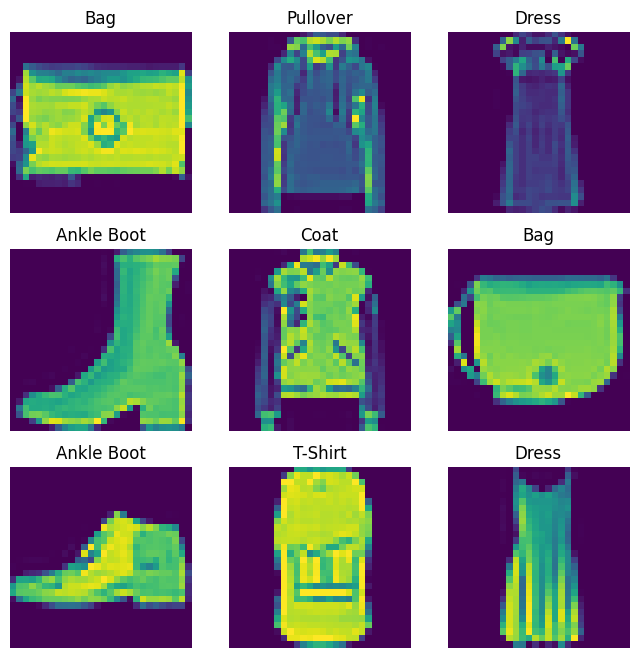

In [30]:
#Visualizing 9 random examples

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(mnist_train), size=(1,)).item()
    img, label = mnist_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze())
plt.show()



In [31]:
#Splitting our data into batch sizes
mnist_batch_size = 9

mnist_train_iter = torch.utils.data.DataLoader(mnist_train,mnist_batch_size,shuffle=True,num_workers=4)
mnist_test_iter = torch.utils.data.DataLoader(mnist_test,mnist_batch_size,shuffle=True,num_workers=4)

In [32]:
#Creating the model and initializing the weights
logit_net = nn.Sequential(nn.Flatten(),nn.Linear(784,10))

#Initializing weights
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

logit_net.apply(init_weights)

#Specifying cross entropy loss
logit_loss = nn.CrossEntropyLoss(reduction='none')

#Specifying Stochastic Gradient Descent trainer
logit_trainer = torch.optim.SGD(logit_net.parameters(), lr=0.1)

In [63]:
num_epochs = 5
for epoch in range(num_epochs):
    print('-------------------')
    print(f'{epoch+1}th epoch')
    print('===================')
    logit_net.train()
    logit_net.zero_grad()
    img, label = next(iter(mnist_train_iter))
    output = logit_net(img)

    l = logit_loss(output,label)
    print(f'Cross entropy:{l}')


    l.mean().backward(retain_graph=True)

    logit_trainer.step()
    print('Coefficients: ',logit_net[1].weight.data)

-------------------
1th epoch
Cross entropy:tensor([2.6140, 2.4999, 1.6841, 5.2464, 5.9849, 3.2052, 2.5439, 2.8832, 2.3724],
       grad_fn=<NllLossBackward0>)
Coefficients:  tensor([[-0.0129,  0.0146, -0.0095,  ..., -0.0069,  0.0108,  0.0130],
        [-0.0019,  0.0078,  0.0101,  ...,  0.0105,  0.0115, -0.0086],
        [-0.0018, -0.0013,  0.0026,  ..., -0.0042,  0.0268, -0.0020],
        ...,
        [-0.0016, -0.0189, -0.0003,  ...,  0.0085,  0.0243, -0.0074],
        [ 0.0162, -0.0179,  0.0144,  ...,  0.0122, -0.0194, -0.0015],
        [ 0.0003, -0.0040, -0.0039,  ...,  0.0020, -0.0022,  0.0067]])
-------------------
2th epoch
Cross entropy:tensor([0.3688, 1.4685, 4.8250, 0.5763, 2.1561, 2.3769, 5.3821, 5.4051, 2.0318],
       grad_fn=<NllLossBackward0>)
Coefficients:  tensor([[-0.0129,  0.0146, -0.0095,  ..., -0.0069,  0.0108,  0.0130],
        [-0.0019,  0.0078,  0.0101,  ...,  0.0105,  0.0115, -0.0086],
        [-0.0018, -0.0013,  0.0026,  ..., -0.0042,  0.0268, -0.0020],
      

In [53]:
img, label = next(iter(mnist_train_iter))
label

tensor([6, 5, 7, 3, 3, 1, 2, 5, 2])

In [49]:
X = logit_net(img)
print(X)

tensor([[-0.0280, -0.0120,  0.1722, -0.0189, -0.0012,  0.0204,  0.2481, -0.0665,
          0.1494,  0.0539],
        [ 0.0860, -0.0827,  0.0981, -0.0666,  0.2536, -0.0898,  0.1182,  0.0058,
         -0.0444, -0.0677],
        [ 0.0363,  0.0248,  0.0345,  0.0495,  0.1045, -0.1097,  0.1063,  0.0230,
          0.0538,  0.0805],
        [ 0.0053,  0.0664,  0.0797,  0.0764,  0.0549,  0.0205,  0.1418,  0.1934,
          0.1212,  0.1188],
        [ 0.1453,  0.0145,  0.0952,  0.1326,  0.0291, -0.0722,  0.2881,  0.1600,
          0.1594,  0.1218],
        [-0.0495,  0.0617,  0.0846,  0.0037, -0.0513,  0.0721,  0.2300,  0.0879,
          0.0834,  0.1524],
        [ 0.0025,  0.0346,  0.0062, -0.0206,  0.0041,  0.0208,  0.0562,  0.0187,
          0.0252,  0.0252],
        [ 0.2094, -0.0157,  0.1228,  0.1042,  0.0586, -0.0223,  0.3365,  0.0940,
          0.1114,  0.1710],
        [ 0.1005, -0.0189,  0.0861,  0.0175,  0.1049,  0.0644,  0.3211,  0.1042,
          0.0683,  0.0467]], grad_fn=<AddmmBack

In [59]:
logit_loss(X,label)

tensor([2.3872, 2.4194, 2.3101, 2.3255, 2.2543, 2.2888, 2.3014, 2.0882, 2.3099],
       grad_fn=<NllLossBackward0>)